In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import boto3

2025-03-10 11:54:01.551075: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-10 11:54:01.654660: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-10 11:54:01.654764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-10 11:54:01.660910: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-10 11:54:01.679519: I tensorflow/core/platform/cpu_feature_guar

In [2]:
key_id = os.getenv("AWS_ACCESS_KEY_ID")
secret_key = os.getenv("AWS_SECRET_ACCESS_KEY")
region = os.getenv("AWS_DEFAULT_REGION")
endpoint = os.getenv("AWS_S3_ENDPOINT")
bucket_name = os.getenv("AWS_S3_BUCKET")
endpoint

'https://minio-api-minio.apps.ocp4.example.com'

In [3]:
s3 = boto3.client(
    "s3",
    region,
    aws_access_key_id=key_id,
    aws_secret_access_key=secret_key,
    endpoint_url=endpoint,
)

# retrieve the metadata of contents within the bucket
objects = s3.list_objects_v2(Bucket=bucket_name)

# output the name of each object within the bucket
for obj in objects["Contents"]:
    print(obj["Key"])
    s3.download_file(bucket_name, obj["Key"], obj["Key"], )

test_images.npy
test_labels.npy
train_images.npy
train_labels.npy


In [4]:
test_images = np.load('test_images.npy')
test_labels = np.load('test_labels.npy')
train_images = np.load('train_images.npy')
train_labels = np.load('train_labels.npy')

In [5]:
train_images.shape
print("Hello")

Hello


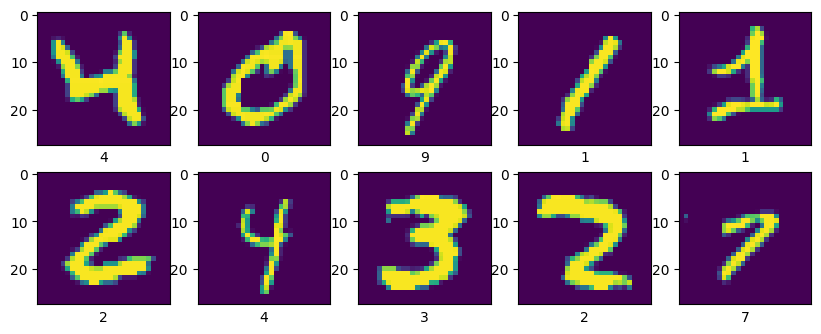

In [6]:
range_start = 20
plt.figure(figsize=(10,10))

for i in range(range_start,range_start + 10):
    plt.subplot(5,5,i-range_start+1)
    plt.xticks([])
    plt.xlabel(str(train_labels[i]))
    plt.imshow(train_images[i])
plt.show()

In [7]:
print (train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
model=None
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28),name='bitmap'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10,activation='softmax')])  

In [10]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0002),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bitmap (Flatten)            (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
train_labels[20]

4

In [12]:
history = model.fit(train_images, train_labels, epochs=10,verbose=1,validation_split=0.1)


Epoch 1/10


/opt/app-root/lib64/python3.9/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1688/1688 [==============================] - 8s 5ms/step - loss: 0.5134 - accuracy: 0.8546 - val_loss: 0.1942 - val_accuracy: 0.9445
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2424 - accuracy: 0.9289 - val_loss: 0.1410 - val_accuracy: 0.9578
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1841 - accuracy: 0.9455 - val_loss: 0.1132 - val_accuracy: 0.9665
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1540 - accuracy: 0.9536 - val_loss: 0.1018 - val_accuracy: 0.9720
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1348 - accuracy: 0.9603 - val_loss: 0.0955 - val_accuracy: 0.9722
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1219 - accuracy: 0.9638 - val_loss: 0.0902 - val_accuracy: 0.9738
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1090 - accuracy: 0.9676 - val_loss: 0.0885 - val_accuracy: 0.9753
Epo

In [ ]:
loss, acc = model.evaluate(train_images,  train_labels, verbose=2)
print("\nTraining accuracy: ", acc)
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\nTesting accuracy: ", acc)

In [ ]:
def plot_loss(history,data_names):
    n = 1
    plt.figure(n,figsize=(10,5))

    for i in data_names:
        plt.plot(history.history[i],label=i)
        plt.xlim([0, len(history.history[i])])
        plt.ylim([np.min(history.history[i]), np.max(history.history[i])])
        plt.xlabel('Epoch')
        #plt.ylabel(i)
        n += 1

    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history,['loss','val_loss'])
plot_loss(history,['accuracy','val_accuracy'])



In [ ]:
#pred_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = model.predict(test_images)

In [ ]:
print(predictions[20])

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(str(predicted_label),
                                         100*np.max(predictions_array),
                                         str(true_label)),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
range_start = 200
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(range_start,range_start+num_images):
    j = i - range_start
    plt.subplot(num_rows, 2*num_cols, 2*j+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*j+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
import tf2onnx
import onnx


In [ ]:
input_signature = [tf.TensorSpec(model.inputs[0].shape, tf.float64, name='bitmap')]
model.output_names=['probabilities']

onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature, opset=13)
onnx.save(onnx_model, "model.onnx")